### Box-Jenkins method 

**From raw data → production model:**

time series → identifcation → estimation → model diagnostics → model okay? (Decision or Repeat) → model production

**(1) Identifcation**

- Is the time series stationary?


- What differencing will make it stationary?


- What transforms will make it stationary?


- What values of p and q are most promising?


Identifcation tools:

- Plot the time series: *df.plot()*


- Use augmented Dicky-Fuller test: *adfuller()*


- Use transforms and/or differencing: *df.diff()*、*np.log()*、*np.sqrt()*


- Plot ACF/PACF: *plot_acf()*、*plot_pacf()*


**(2) Estimation**

Use the data to train the model coeffcients:

- Using *model.fit()*


- Choose between models using AIC and BIC: *results.aic*、*results.bic*


**(3) Model diagnostics**

- How good is the final model?


- How far our the predictions from the real values?


a. Residuals:

- Are the residuals uncorrelated?


- Are residuals normally distributed?


Assign residuals to variable: *residuals = results.resid*

b. Mean absolute error:

   - *mae = np.mean(np.abs(residuals))*

c. Diagnostic tools:

(i) Plot diagnostics: *Residuals plot*、*Histogram plus estimated density*、*Normal Q-Q*、*Correlogram*

- If the model fits well, the residuals will be white Gaussian noise.

- Create the 4 diagostics plots:
 
  *results.plot_diagnostics()*
  
  *plt.show()*


(ii) Summary statistics: *print(results.summary())*

- Prob(Q): p-value for null hypothesis that residuals are uncorrelated


- Prob(JB): p-value for null hypothesis that residuals are normal


**(4) Production**

a. Get prediction and forecasting

(i) One-step-ahead predictions

- Make in-sample predictions for last N values

  *forecast = results.get_prediction(start=-N)*

(ii) Dynamic predictions

- Make in-sample predictions for last N values

  *forecast = results.get_prediction(start=-N, dynamic=True)*

(iii) Forecasting out of sample

- Make out-sample forecasting for N values

  *forecast = results.get_forecast(steps=N)*


b. Plot prediction and forecasting

- Forecast mean

  *mean_forecast = forecast.predicted_mean*


- Extract the forecast dates

  *dates = mean_forecast.index*


- Plot prediction/forecasting

  *plt.figure()*

  *plt.plot(dates, mean_forecast.values, color='color_name', label='prediction/forecasting')*


- Get confidence intervals of forecasts

  *confidence_intervals = forecast.conf_int()*


- Shade uncertainty area

  *plt.fill_between(dates, lower_limits=conf_int.iloc[:,0], upper_limits=conf_int.iloc[:,1], color='color_name')*

  *plt.show()*

### Seasonal ARIMA Model

**Seasonal time series**

(1) Seasonal decomposition: time series = trend + seasonal + residual

- seasonal_decompose package

(2) Using the ACF and PACF to test seasonality

- Detrending the time series


- Finding the seasonal period: $S$


**SARIMA model**

(1) Seasonal ARIMA = SARIMA

SARIMA $(p, d, q)(P, D, Q)_{S}$:

a. Seasonal Orders

- P: seasonal autoregressive order

- D: seasonal differencing order

- Q: seasonal moving average order

- S: number of time steps per cycle

b. Non-seasonal orders

- p: autoregressive order

- d: differencing order

- q: moving average order

Examples:

- ARIMA $(2, 0, 1)$ model:

$$y_{t} = a_{1} \cdot y_{t−1} + a_{2} \cdot y_{t−2} + m_{1} \cdot ϵ_{t−1} + ϵ_{t}$$

- SARIMA $(0, 0, 0)(2, 0, 1)_{5}$ model:

$$y_{t} = a_{5} \cdot y_{t−5} + a_{10} \cdot y_{t−10} + m_{5} \cdot ϵ_{t−5} + ϵ_{t}$$


(2) Seasonal differencing: Subtract the time series value of one season ago 

- Take the seasonal difference ($Δy_{t} = y_{t} − y_{t-S}$): *df.diff(S)*


(3) Choosing SARIMA order

- [Manually] Searching over model orders (for-loop) to find the lowest AIC or BIC


- [Manually] Using ACF and PACF to find non-seasonal and seasonal orders: p/q and P/Q


- [Automated model selection]: pmdarima package

  *import pmdarima as pm*

  *auto_arima_results = pm.auto_arima(df)*
  

*Non-seasonal search parameters:*

                         d=0,        # non-seasonal difference order
                         start_p=0,  # initial guess for p
                         start_q=0,  # initial guess for q
                         max_p=3,    # max value of p to test
                         max_q=3,    # max value of q to test


*Seasonal search parameters:*

                         seasonal=True,  # Is the time series seasonal?
                         m=6,            # the seasonal period
                         D=1,            # seasonal difference order
                         start_P=0,      # initial guess for P
                         start_Q=0,      # initial guess for Q
                         max_P=2,        # max value of P to test
                         max_Q=2,        # max value of Q to test

*Other parameters:*

                         information_criterion='aic',  # used to select best model
                         trace=True,                   # print results whilst training
                         error_action='ignore',        # ignore orders that don't work
                         stepwise=True,                # apply intelligent order search
                         trend='c'                     # set the trend to constant

pymarima results:

- *print(auto_arima_results.summary())*


- *auto_arima_results.plot_diagnostics()*


(4) Fitting a SARIMA model

- Imports

  *from statsmodels.tsa.statespace.sarimax import SARIMAX*


- Instantiate model

  *model = SARIMAX(df, order=(p, d, q), seasonal_order=(P, D, Q, S))*


- Fit model

  *results = model.fit()*


(5) Model diagnostics

- Plot diagnostics: Residuals plot、Histogram plus estimated density、Normal Q-Q、Correlogram

  *results.plot_diagnostics()*

  *plt.show()*


- Summary statistics

  *print(results.summary())*

(6) Making forecast

- the mean forecast prediction

  *results.get_forecast(steps=N).predicted_mean*
   
(7) Saving model object

- Import

  *import joblib*
  

- Select a filepath

  *filepath ='localpath/great_model.pkl'*


- Save model to filepath

  *joblib.dump(model_results_object, filepath)*


- Load model object from filepath

  *model_results_object = joblib.load(filepath)*


(8) Updating model

- Add new observations and update parameters

  *model_results_object.update(df_new)*
  

**Box-Jenkins method with SARIMA model**

(1) Box-Jenkins method with seasonal data in **identifcation stage**: 

- Determine if time series is seasonal


- Find seasonal period


- Find transforms to make data stationary:

  a. Seasonal/non-seasonal differencing
   
  b. Other transforms


(2) Mixed differencing

- D should be 0 or 1


- d + D should be 0 ~ 2


(3) Weak vs strong seasonality

a. Weak seasonal pattern

- Use seasonal differencing if necessary


b. Strong seasonal pattern

- Always use seasonal differencing


(4) Additive vs multiplicative seasonality

a. Additive series = trend + season

- Proceed as usual with differencing


b. multiplicative series = trend x season

- Apply log transform: np.log()

### Case study: CO2 emission

#### 1. Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.unicode_minus"] = False

CO2 = pd.read_csv("Monthly_Record_of_CO2.xls", index_col=0)

# Convert the index to a datetime object
CO2.index = pd.to_datetime(CO2.index, format='%Y-%m-%d')

CO2

,CO2_ppm
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86
1958-08-01,314.93
1958-09-01,313.20
1958-10-01,312.66
1958-11-01,313.33


#### 2. Find seasonal period: S

Seasonal decomposition

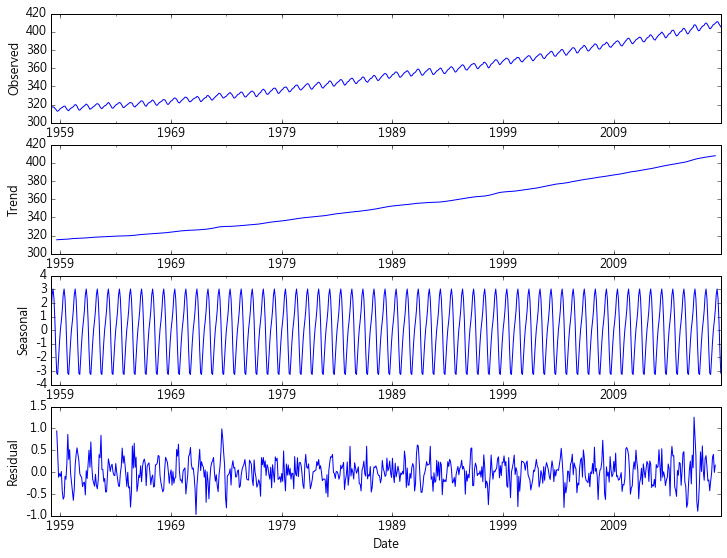

In [2]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(CO2['CO2_ppm'], freq=12)

# Plot decomposition
def plotseasonal(res):
    fig, axes = plt.subplots(4, 1, figsize=(12, 9))
    
    res.observed.plot(ax=axes[0])
    axes[0].set_ylabel('Observed', fontsize = 12)
    res.trend.plot(ax=axes[1])
    axes[1].set_ylabel('Trend', fontsize = 12)
    res.seasonal.plot(ax=axes[2])
    axes[2].set_ylabel('Seasonal', fontsize = 12)
    res.resid.plot(ax=axes[3])
    axes[3].set_ylabel('Residual', fontsize = 12)
    
    for i in range(0, 4):
        axes[i].set_xlabel('Date', fontsize = 12)
        axes[i].tick_params(axis = 'both', labelsize = 12)

    plt.show()

plotseasonal(decomp)

Use the ACF and PACF to test seasonality

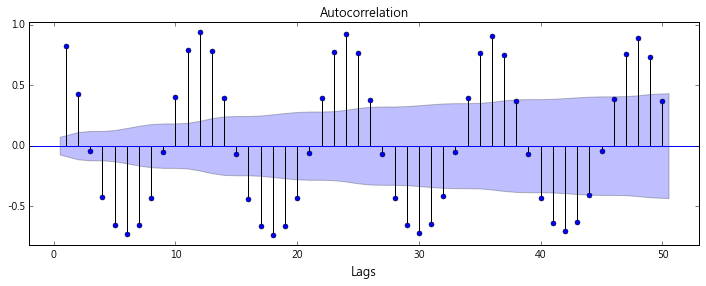

In [3]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Subtract the rolling mean (a window size of any value must be bigger than the likely period)
CO2_rm = CO2 - CO2.rolling(15).mean()

# Drop the NaN values
CO2_rm = CO2_rm.dropna()

# Create figure and subplots
fig, ax = plt.subplots(figsize=(12,4))
ax.set_xlabel("Lags", fontsize = 12)

# Plot the ACF
plot_acf(CO2_rm['CO2_ppm'], lags=50, zero=False, ax=ax)

# Show figure
plt.show()

#### Make data stationary:

(1) Seasonal and non-seasonal differencing 

- strong seasonal pattern and additive seasonality


- d = 1 and D = 1 


#### Choose SARIMA order

(1) Using ACF and PACF to find non-seasonal and seasonal orders: p/q and P/Q

Non-seasonal orders: p and q

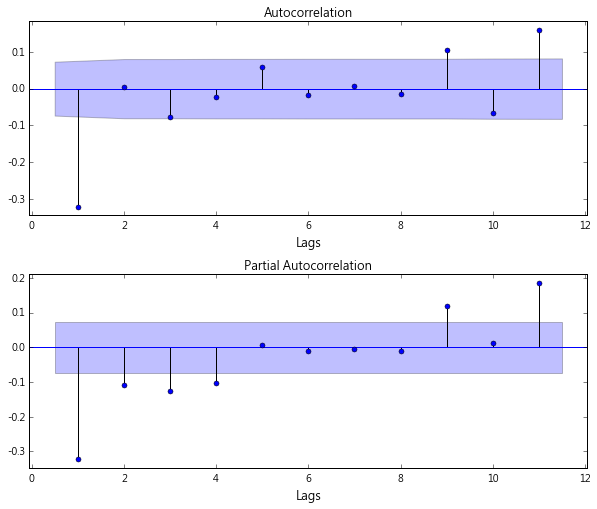

In [4]:
# Take the first and seasonal differences and drop NaNs
CO2_diff = CO2.diff().diff(12).dropna()

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.set_xlabel("Lags", fontsize = 12)
ax2.set_xlabel("Lags", fontsize = 12)
plt.subplots_adjust(hspace = 0.3)

# Plot the ACF on ax1
plot_acf(CO2_diff, lags=11, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(CO2_diff, lags=11, zero=False, ax=ax2)

plt.show()

Seasonal orders: P and Q

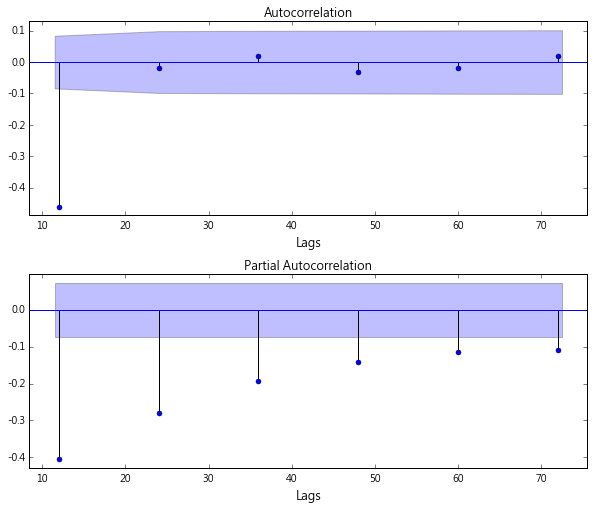

In [5]:
# Make list of lags
lags = [12, 24, 36, 48, 60, 72]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.set_xlabel("Lags", fontsize = 12)
ax2.set_xlabel("Lags", fontsize = 12)
plt.subplots_adjust(hspace = 0.3)

# Plot the ACF on ax1
plot_acf(CO2_diff, lags=lags, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(CO2_diff, lags=lags, zero=False, ax=ax2)

plt.show()

#### Fit a SARIMA model

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

model = SARIMAX(CO2, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

sarima_results = model.fit()

                                 Statespace Model Results                                 
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -183.113
Date:                            Mon, 06 Jan 2020   AIC                            374.226
Time:                                    10:56:04   BIC                            392.510
Sample:                                03-01-1958   HQIC                           381.287
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1960      0.081      2.409      0.016       0.037       0.355
ma.L1         -0.5609      0.070   

#### SARIMA model diagnostics

                                 Statespace Model Results                                 
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -183.113
Date:                            Mon, 06 Jan 2020   AIC                            374.226
Time:                                    11:06:52   BIC                            392.510
Sample:                                03-01-1958   HQIC                           381.287
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1960      0.081      2.409      0.016       0.037       0.355
ma.L1         -0.5609      0.070   

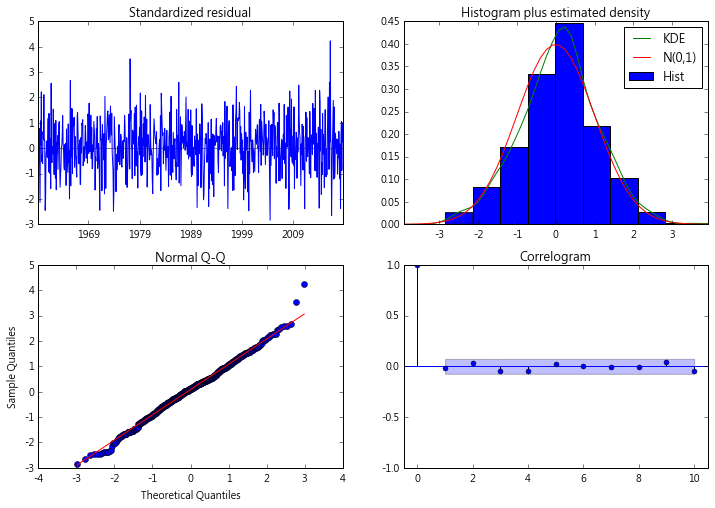

In [24]:
print(sarima_results.summary())

sarima_results.plot_diagnostics(figsize=(12, 8))
plt.show()

#### Automated model selection by using pmdarima package 

(Choose SARIMA order + Fit SARIMA model + SARIMA model diagnostics)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=846.076, BIC=855.218, Fit time=0.148 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=591.235, BIC=609.518, Fit time=2.054 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=372.931, BIC=391.215, Fit time=4.207 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=846.076, BIC=855.218, Fit time=0.147 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=752.232, BIC=765.945, Fit time=0.468 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=374.914, BIC=397.768, Fit time=7.755 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=573.147, BIC=591.431, Fit time=1.888 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=457.825, BIC=471.537, Fit time=1.872 seconds
Near non-invertible roots for order (0, 1, 0)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 

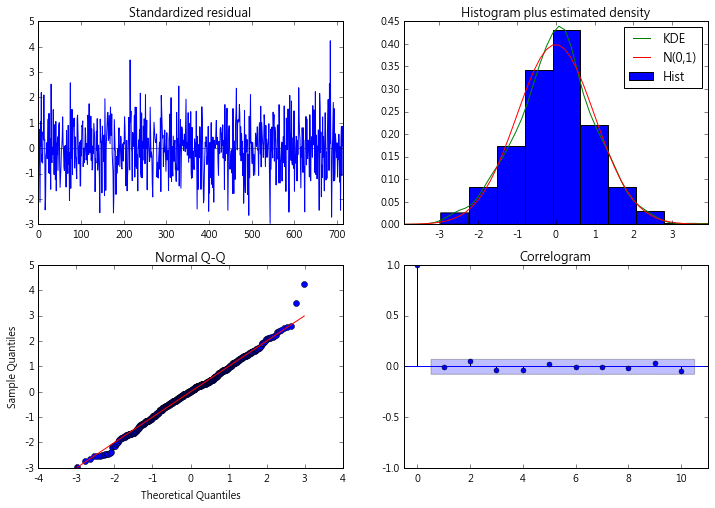

In [8]:
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')

auto_arima_results = pm.auto_arima(CO2, d=1, start_p=0, start_q=0, max_p=1, max_q=1, 
                                   seasonal=True, m=12, D=1, start_P=0, start_Q=0, max_P=1, max_Q=1, 
                                   information_criterion='aic', trace=True,  error_action='ignore', 
                                   stepwise=True, trend='c')

print(auto_arima_results.summary())
auto_arima_results.plot_diagnostics(figsize=(12, 8))

#### SARIMA forecast

Forecasting out of sample

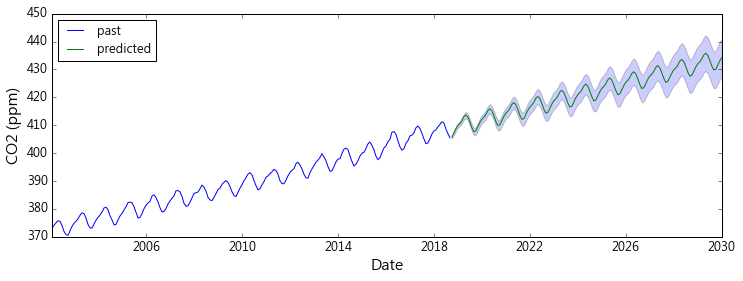

In [23]:
# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(steps=136)
sarima_mean = sarima_pred.predicted_mean

# Extract the confidence intervals
conf_int = sarima_pred.conf_int()

# Extract the forecast dates
dates = sarima_mean.index

fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlabel("Date", fontsize = 15)
ax.set_ylabel("CO2 (ppm)", fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 12)

# Plot mean SARIMA predictionss
plt.plot(CO2.index[-200:], CO2[-200:], label='past')
plt.plot(dates, sarima_mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], alpha=0.2)
plt.legend(loc='upper left')
plt.show()

In [19]:
# Print last predicted mean
print("The last predicted mean:", sarima_mean.iloc[-1])

# Print last confidence interval
print("The last confidence interval:", conf_int.iloc[-1])

The last predicted mean: 434.260537227
The last confidence interval: lower CO2_ppm    427.484727
upper CO2_ppm    441.036347
Name: 2030-01-01 00:00:00, dtype: float64
